# Linear Regression

Review on supervised learning:
- In supervised learning there is an input vector of features and a target which is also called response or output. 
- The goal is to learn a function that maps the input features to the target.

In supervised learning, the linear regression is one the simplest but imortant models. In linear regression, we use a linear function of features to predict the target value. In the simplest case (1D), we only have one feature, and the linear equation can be written as: 

y = m*x + b

where x is the feature and y is the target. This is the equation of line and depending on the choice of m and b, we can have different lines. The goal is to find m and b values such that we get the "best" line. 

The following example will clarify the idea. Lets assume we have a dataset (D) containing pairs of x and y values ($x_i, y_i$). For example our dataset is the following:

D = {(0,2), (1,5), (2,8), (3,11), (4,14), (5,17), (6,20), (7,23), (8,28), (9,29)}

Using dataset D we want to find $m$ and $b$ so that for a new point (for example x = 10), we can predict the target value. To do so, we need to define a function that evaluates how bad is our prediction (how far is our predeited value from the actual target value). The function is called **Cost Function**, and can be something of the form:

$\frac{1}{N}\sum (y_{i} - \hat{y_{i}})^2$

where $\hat{y_{i}}$ is the prediction and $y_{i}$ is the actual target value. So, we can find $m$ and $b$ in a way that the cost function become minimized. 

Thanksfully, Python has a free machine learning library which is called Scikit-learn where we can use a linear module to do the related math to minimze the loss function. During this BootCamp we are going to use Scikit-learn library. Here is the link to its official web page: https://scikit-learn.org/stable/index.html
Forcusing on the linear regression, we are going to talk more about the linear regression module: our focus is to find the best m and b values for dataset D, and predict the output for x = 10: 

First we are hoing to write a very short code (contains 3 lines) to make our dataset D. Then, we use Scikit-learn library to find $m$ and $b$.  
 



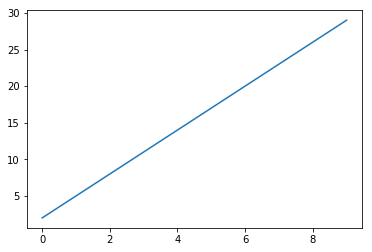

In [5]:
# we are using numpy library to make an array for x values. In the dataset D, 
# x values are ranging from 0 to 9 so we can make an array by using 
# np.arrange(min_value, max_value, step) 
import numpy as np
x = np.arange(0,10,1)
# We made a list of all y values as was presented in dataset D. 
y = [ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29]
# y is a python list and we should change it to a numpy array so we can do it as:
y = np.array(y)
# The sklearn.linear_model expects a 2D array so 
#we need to reshape our x and y arrays as follows
import matplotlib.pyplot as plt
plt.plot(x,y)

In [7]:
# The sklearn.linear_model expects a 2D array so 
#we need to reshape our x and y arrays as follows:
print(y)
y_train = y.reshape(len(y),1)
print(y_train)
x_train = x.reshape(len(x),1)
print(x_train)

[ 2  5  8 11 14 17 20 23 26 29]
[[ 2]
 [ 5]
 [ 8]
 [11]
 [14]
 [17]
 [20]
 [23]
 [26]
 [29]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


To import the module: from sklearn.linear_model import LinearRegression
The methods we are going to use are as follows:

- To fit the linear model we use: fit(x_train,y_train):
- To predict the outcome for a new x: predict(x_test)



In [13]:
# we are going to import the LinearRegression module 
from sklearn.linear_model import LinearRegression
# Fits the linear model for our dataset D which contains x_train and y_train arrays
reg = LinearRegression().fit(x_train, y_train )
# Gives the m value which is also known as the coefficient of linear function
m = reg.coef_
# Gives the b value which is known as the intercept of the linear function 
b = reg.intercept_
# Predicts the target value for an x value that has not seen in the training set (D). 
# We call this x_test
x_test = 10
prediction = reg.predict(np.array([[x_test]]))
print(prediction)
# This infact is the correct prediction the underlying function is y = 3*x + 2 so if x = 10 
# we will get y = 32

[[32.]]


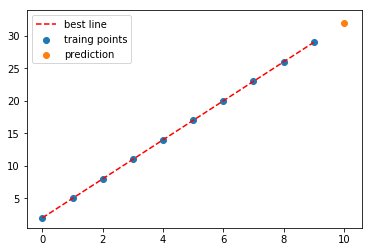

In [14]:
# Here the scatter points are shown in blue (x and y values of the trainig set). 
# Using the calculted m and b, we can find the optimized line (red dotted line). 
# As is shown the line is perfect and going through all the points! 

import matplotlib.pyplot as plt
plt.scatter(x_train,y_train, label = 'traing points')
Y_pred = m*x_train + b
plt.plot(x_train,y_train, '--r', label = 'best line')
plt.scatter(x_test,prediction, label = 'prediction')
plt.legend()

In [6]:
#This is a perfect exmaple, but normally the training set contains some noise.
# Here we add a bit of noise into data! We add gaussian noise (a very common choice). 
# To add Gaussian (Normal) noise we can use numpy library (np.random.normal).

In [16]:
# Adding noise to data
noise = np.random.normal(0,1,len(x_train))
x_with_noise = x+ noise
x_with_noise = x_with_noise.reshape(len(x_with_noise),1)

In [17]:
# Now we repeat the regression model process but this time the x values are noise (x_with_noise). 
# so a new m and b values (corresponding to a line) are calculted.
# Now, the y value predicted for x_test has become less perfect! 
from sklearn.linear_model import LinearRegression
reg_noisy = LinearRegression().fit(x_with_noise, y_train )

m_noisy = reg_noisy.coef_
b_noisy = reg_noisy.intercept_
x_test = 10
prediction_noisy_data = reg_noisy.predict(np.array([[x_test]]))
print(prediction_noisy_data)
# The underlying function is still y = 3*x + 2 so if x = 10, we expect to get y = 32! 
# But, as the training data were noisy, now the prediction has become less perfect!  

[[30.96391437]]


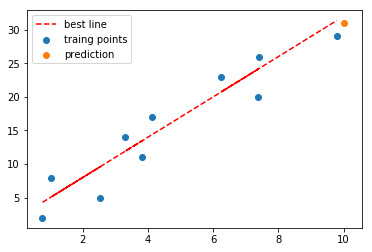

In [19]:
# Here again we shoe the training points (in blue) and show the "best" line. 
# You can obviously see the difference between this example and the case 
# where data were perfectly aligned. 

import matplotlib.pyplot as plt
plt.scatter(x_with_noise,y_train, label = 'traing points')
Y_pred = m*x_with_noise + b
plt.plot(x_with_noise,Y_pred, '--r', label = 'best line')
plt.scatter(x_test,prediction_noisy_data, label = 'prediction')
plt.legend()



# The coefficient of determination ($R^2$)
In real life applications we mostly deal with non perfect data with noise. It is also possible that data are not too noisy but in reality they dont follow a perfect line (they are not all alined in one line), still they can be estimated by a line. Perhaps the goodness of fit can help us if a linear regression is a good choice! 


The coefficient of determination ($R^2$) can be used as a diagnostic tool to determine if the linear regression has produces approppriate result. $R^2$ is defines as:

$1 - \frac{\sum_i(y_{true}^i - y_{prediction}^i)^2}{\sum_i(y_{true}^i - \overline{y}_{true})^2}.$

Where $y_{true}$ is the true value, and $y_{prediction}$ is the output of the regression model. The best possible score is 1 which indicates a perfect match between the predcitions and true values using a linear regression. Using Scikit-learn, we can calculate the $R^2$ by using the following command: 
 


In [20]:
# Calculating $R^2$ score: 
print(reg.score(x_train, y_train))
print(reg.score(x_with_noise, y_train))
# Depending on the task the score above 90% considered excellent! 

1.0
0.8880116077319127
